<a href="https://colab.research.google.com/github/lalalalalala-hi/AI-and-Machine-Learning/blob/main/Heart_Disease_Classification_using_Clustering_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


*   os - OS interation (file navigation)
*   pandas - data analysis
*   drive - Google Drive Integration
*   StandardScalar - standardize features
*   K-means - clustering
*   PCA - dimensionality reduction
*   f_oneway - One-way ANOVA
*   pyplot - plotting
*   seaborn- statistical graphics
*   numpy - array/matrix operations

In [ ]:
import os
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Navigate to the Directory
path = '/content/drive/My Drive/Testing Data'
os.listdir(path)

['2nd Floor KTF.zip', 'marketing_campaign.csv', 'processed.cleveland.data.csv']

In [ ]:
# Load the data into a DataFrame
file_path = '/content/drive/My Drive/Testing Data/processed.cleveland.data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Data Cleaning

In [ ]:
# Replace non-numeric values (e.g., "?") with NaN
data.replace('?', pd.NA, inplace=True)

In [ ]:
# Drop rows with any NaN values and reset the index
data_cleaned = data.dropna().reset_index(drop=True)
print("Number of data after cleaing:",len(data_cleaned))

Number of data after cleaing: 297


# Data Preprocessing

In [ ]:
# Select relevant features
features = data_cleaned[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

In [ ]:
# Convert all values to numeric, forcing errors to NaN
features = features.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Check for missing values and handle them
features = features.dropna()  #

**Standardization** is a preprocessing step where features are scaled to have a mean of zero and a standard deviation of one.

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dimensionality Reduction

**PCA (Principal Component Analysis)** is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional form while retaining as much variance as possible. This helps in reducing the complexity of the data, removing noise, and making the data more suitable for analysis or modeling.

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components
pca_features = pca.fit_transform(scaled_features)

In [ ]:
# Create a DataFrame with the reduced features
reduced_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

# Clustering

**Clustering** is a method of partitioning a set of data points into groups, called clusters, such that points in the same cluster are more similar to each other than to those in other clusters.

**K-Means** aims to partition the data into K clusters. The algorithm works as follows:

*   Initialization: Choose K initial cluster centroids randomly.
*   Assignment: Assign each data point to the nearest centroid based on the Euclidean distance. This forms K clusters
*   Update: Calculate the new centroids as the mean of all data points assigned to each cluster.
*   Repeat: Repeat the assignment and update steps until the centroids do not change significantly or a maximum number of iterations is reached.


In [ ]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate distances of each point to its nearest cluster centroid
distances = kmeans.transform(scaled_features)
nearest_cluster_distance = np.min(distances, axis=1)

**Outliers** are data points that deviate significantly from the majority of the data, requiring identification and appropriate handling to prevent distortion of statistical analyses and machine learning models.

In [ ]:
# Add cluster labels to the reduced dataframe
reduced_df['Cluster'] = labels

In [ ]:
# Calculate the mean distance within clusters
mean_cluster_distance = np.mean(np.min(distances, axis=1))

# Set a threshold for outlier detection (e.g., 2 times the mean distance)
outlier_threshold = 2 * mean_cluster_distance

# Identify outliers
outliers = data_cleaned[nearest_cluster_distance > outlier_threshold]

# Display outliers
print("Detected outliers:")
print(outliers)

Detected outliers:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
90    62    0   4       160   164    0        2      145      0      6.2   
120   63    0   4       150   407    0        2      154      0      4.0   
122   55    1   4       140   217    0        0      111      1      5.6   
125   56    0   4       200   288    1        2      133      1      4.0   
151   67    0   3       115   564    0        2      160      0      1.6   

     slope ca thal  num  
90       3  3    7    3  
120      2  3    7    4  
122      3  0    7    3  
125      3  2    7    3  
151      2  0    7    0  


# Hypothesis Testing

In [ ]:
cluster_data = data_cleaned.copy()
cluster_data['Cluster'] = labels

In [ ]:
# Print the counts of data points in each cluster
print("Counts of data points in each cluster:")
print(cluster_data['Cluster'].value_counts())
cluster_data.head()


Counts of data points in each cluster:
Cluster
2    134
0     89
1     74
Name: count, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Cluster
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,2


**ANOVA (Analysis of Variance)** is a statistical test used to compare the means of three or more groups to determine if there are statistically significant differences between them.

In [ ]:
# ANOVA test for age
f_statistic_age, p_value_age = f_oneway(cluster_data[cluster_data['Cluster'] == 0]['age'],
                                         cluster_data[cluster_data['Cluster'] == 1]['age'],
                                         cluster_data[cluster_data['Cluster'] == 2]['age'])


In [ ]:
# ANOVA test for cholesterol
f_statistic_chol, p_value_chol = f_oneway(cluster_data[cluster_data['Cluster'] == 0]['chol'],
                                           cluster_data[cluster_data['Cluster'] == 1]['chol'],
                                           cluster_data[cluster_data['Cluster'] == 2]['chol'])

* A low p-value (typically below a chosen significance level, e.g., 0.05) indicates that there are significant differences between the clusters for the respective variable.
* The F-statistic measures the ratio of variance between groups to variance within groups. A larger F-statistic suggests greater differences between groups relative to the differences within groups.

In [ ]:
# Visual Inspection: Observe if clusters align with hypotheses
print("ANOVA for age:")
print("F-Statistic:", f_statistic_age)
print("p-value:", p_value_age)

print("ANOVA for cholesterol:")
print("F-Statistic:", f_statistic_chol)
print("p-value:", p_value_chol)

ANOVA for age:
F-Statistic: 120.74883388653791
p-value: 5.2443632471300316e-39
ANOVA for cholesterol:
F-Statistic: 38.39996216697696
p-value: 1.5259171484070992e-15


# Data Visualization

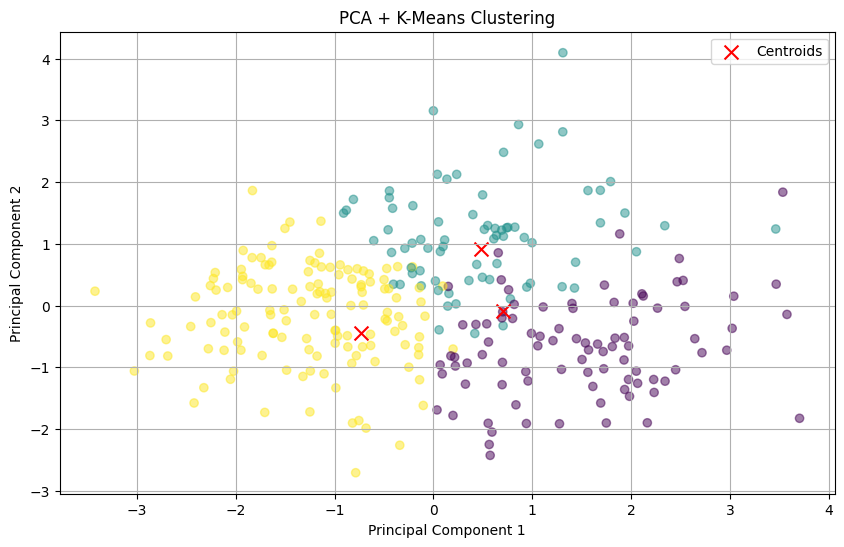

In [ ]:
# Plot the reduced dataframe with cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('PCA + K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Data Analysis

In [ ]:
# Calculate characteristics/patterns for each group
cluster_characteristics = cluster_data.groupby('Cluster').agg({
    'age': ['mean', 'median', 'std'],
    'trestbps': ['mean', 'median', 'std'],
    'chol': ['mean', 'median', 'std'],
    'thalach': ['mean', 'median', 'std'],
    'oldpeak': ['mean', 'median', 'std'],
    'ca': lambda x: x.value_counts().index[0],  # Most common value
})

In [ ]:
# Display characteristics/patterns for each group
print("Characteristics/Patterns for Each Group:")
print(cluster_characteristics)

Characteristics/Patterns for Each Group:
               age                     trestbps                          chol  \
              mean median       std        mean median        std        mean   
Cluster                                                                         
0        60.932584   61.0  6.480386  130.202247  130.0  15.396413  242.831461   
1        58.878378   59.0  5.949451  147.932432  147.0  17.799747  286.972973   
2        47.902985   47.5  7.270157  123.716418  124.0  12.614952  228.470149   

                              thalach                     oldpeak         \
        median        std        mean median        std      mean median   
Cluster                                                                    
0        246.0  47.107043  129.752809  130.0  21.409578  1.892135   1.80   
1        283.5  57.484476  151.864865  154.0  17.233548  0.994595   0.80   
2        226.5  38.588379  161.529851  162.5  17.181775  0.533582   0.05   

               

# Prediction

In [ ]:
# Create a DataFrame with new data
new_data = pd.DataFrame({
    'age': [62, 55, 41],
    'trestbps': [140, 160, 130],
    'chol': [230, 250, 204],
    'thalach': [150, 160, 187],
    'oldpeak': [2.5, 1.5, 1.4],
    'ca': [1, 2, 0]
})


In [ ]:
# Standardize the features of the new data using the same scaler
scaled_new_data = scaler.transform(new_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']])

# Predict clusters for the new data using the trained K-Means model
new_data['predicted_cluster'] = kmeans.predict(scaled_new_data)

# Display the new data with predicted clusters
print("New data with predicted clusters:")
print(new_data)

New data with predicted clusters:
   age  trestbps  chol  thalach  oldpeak  ca  predicted_cluster
0   62       140   230      150      2.5   1                  0
1   55       160   250      160      1.5   2                  1
2   41       130   204      187      1.4   0                  2
